# Run training script

(It takes a long time - best to run it in tmux)

In [1]:
import subprocess


output = subprocess.check_output(["python", "../isom/train_isom.py"]).decode()
print(output)


Average quantum yield is 0.5936094522476196
Average quantum yield is 0.4772546887397766
Average quantum yield is 0.5991412997245789
Average quantum yield is 0.6248917579650879
Average quantum yield is 0.6400759816169739



# Learned fields

(This comes from a separate run with 50 epochs)

In [118]:
import json
import numpy as np
from matplotlib import pyplot as plt

# electric fields
with open('../isom/e_fields.json', 'r') as f:
    fields = json.load(f)
    
# quantum yields
with open('../isom/q_yields.json', 'r') as f:
    yields = json.load(f)
    
    
# time-dependent quantum yields
with open('../isom/t_dep_yields.json', 'r') as f:
    t_yields = json.load(f)

Visualize the different electric fields over the epochs (not that you can see much):

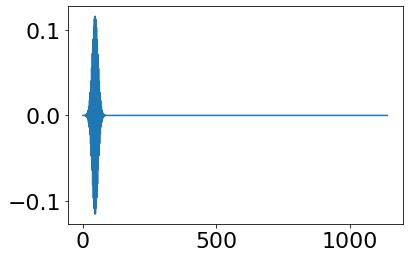

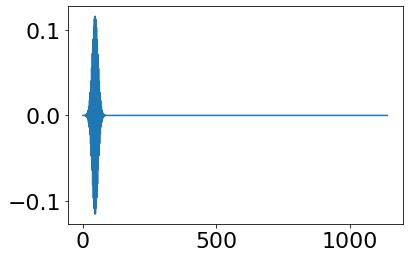

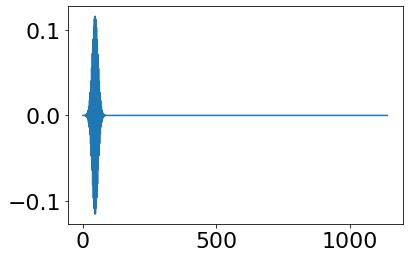

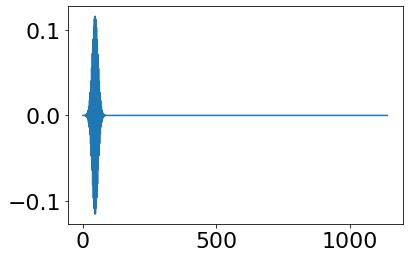

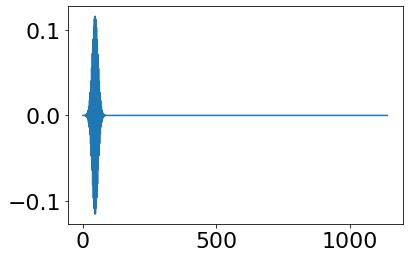

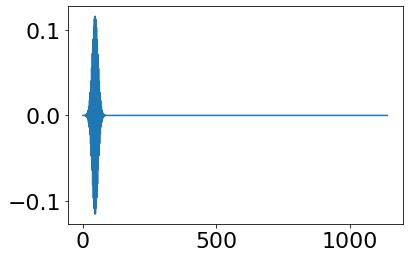

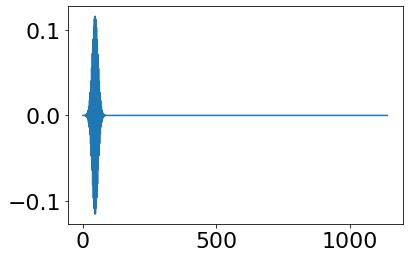

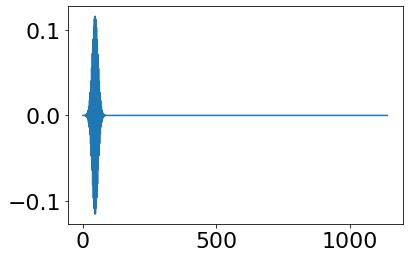

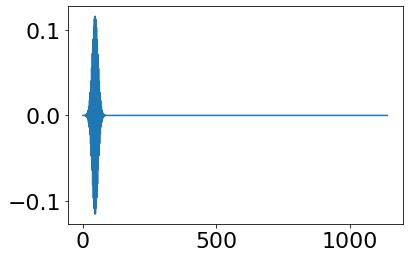

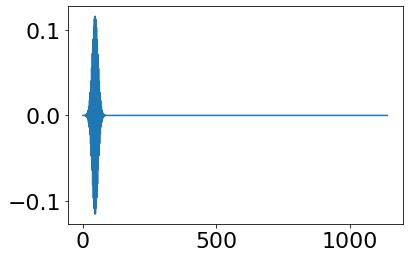

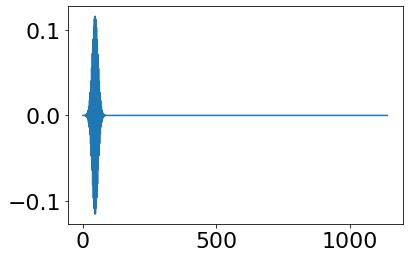

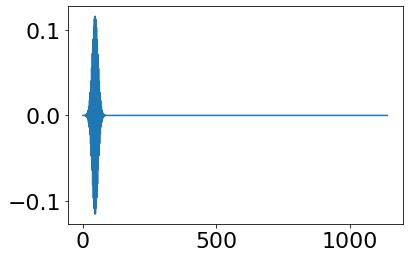

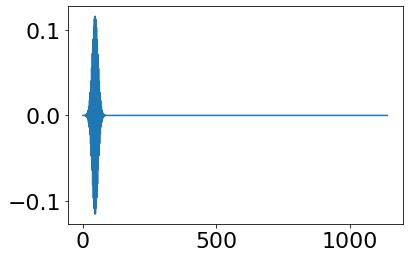

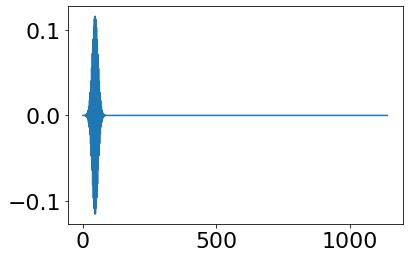

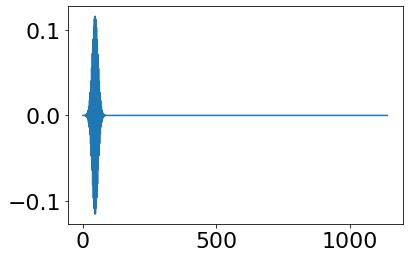

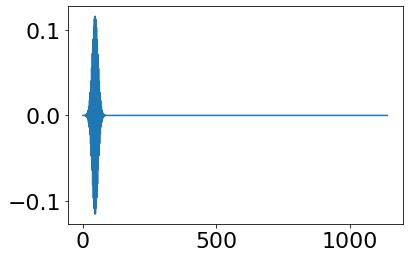

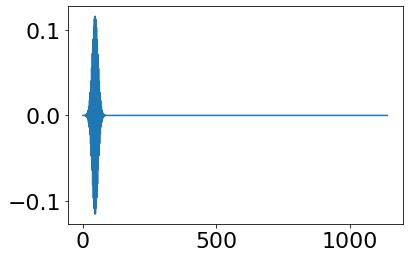

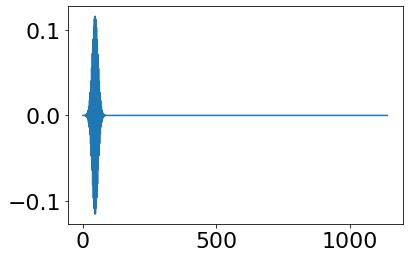

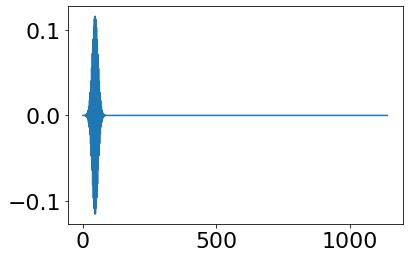

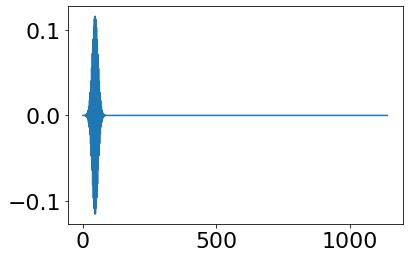

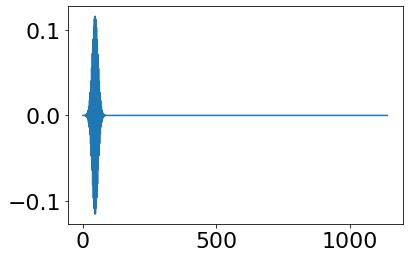

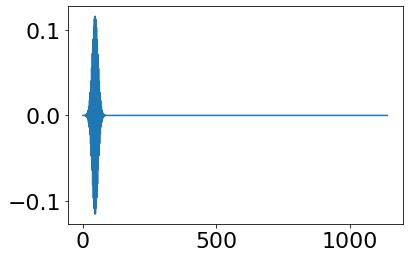

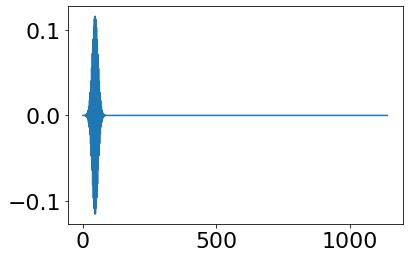

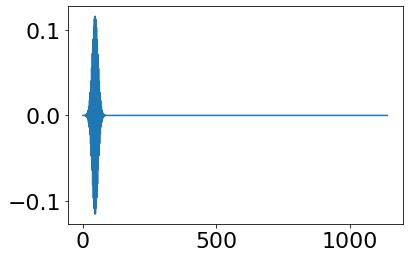

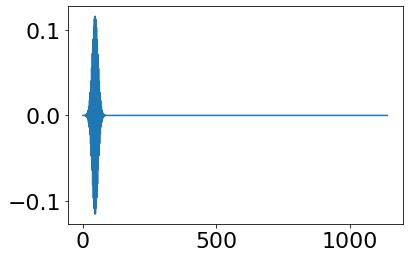

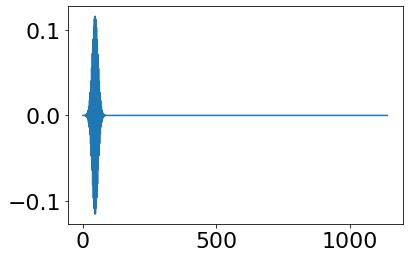

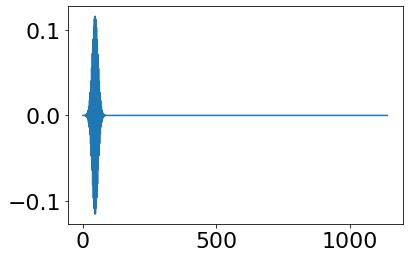

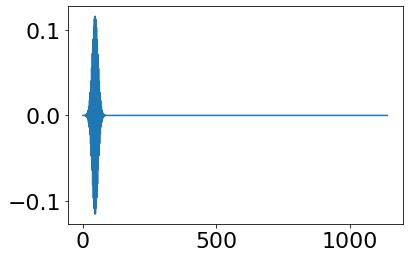

In [119]:
for i in range(len(fields)):
    plt.plot(np.array(fields[i])[:, 0], np.array(fields[0])[:, 1])
    plt.show()

Quantum yield vs. epoch:

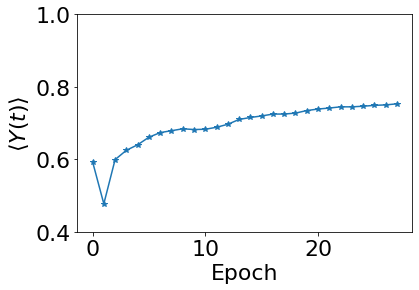

In [121]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

plt.plot(yields, '-*')
plt.xlabel('Epoch')
plt.ylabel(r'$\langle Y(t) \rangle$')
plt.ylim([0.4, 1])
plt.savefig('yield_vs_epoch.eps')
plt.show()

Different time-dependent quantum yields:

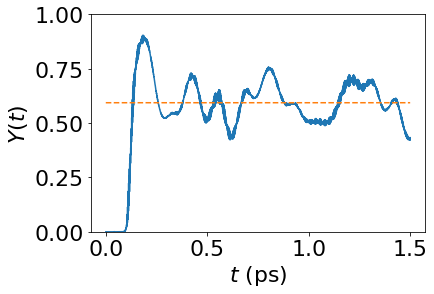

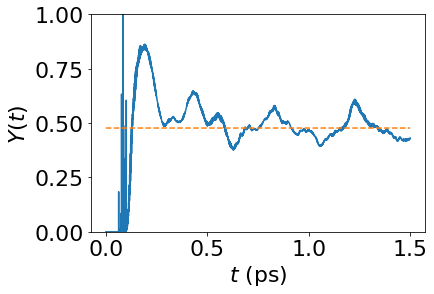

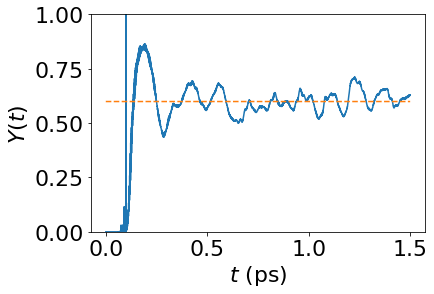

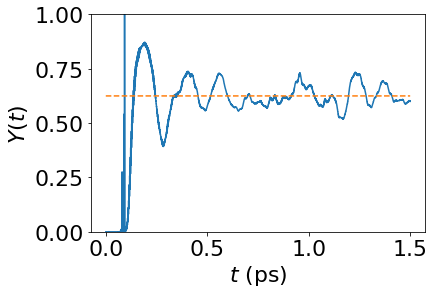

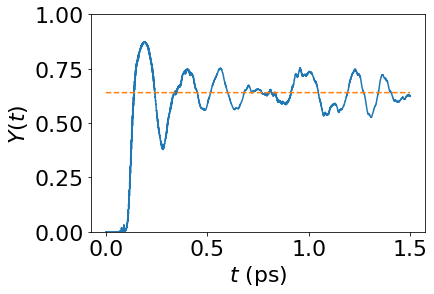

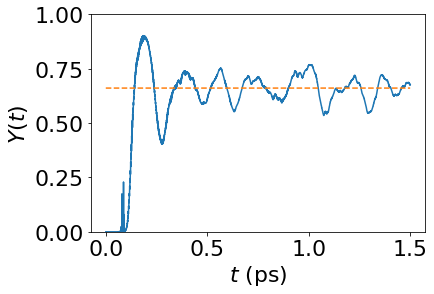

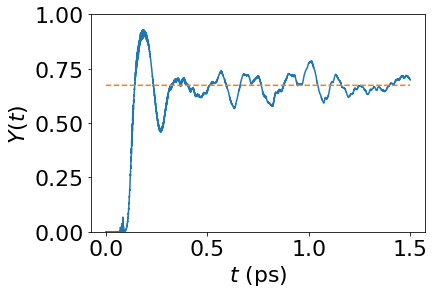

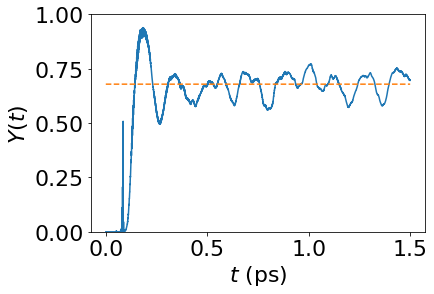

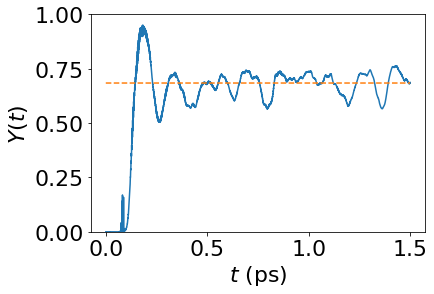

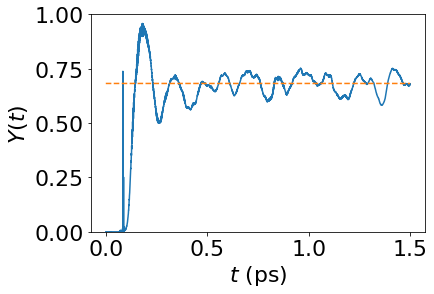

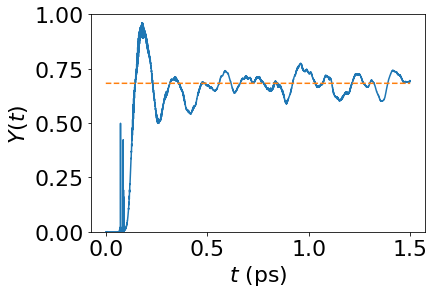

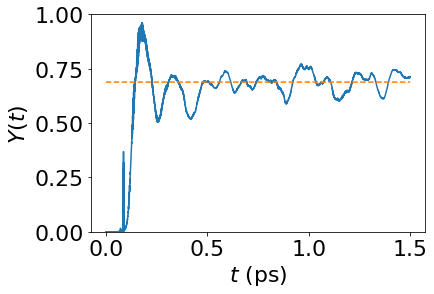

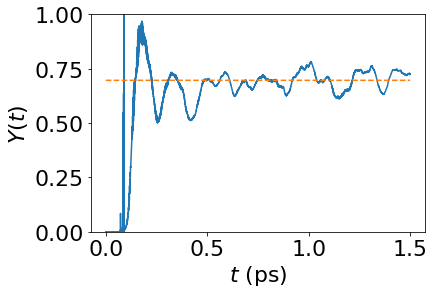

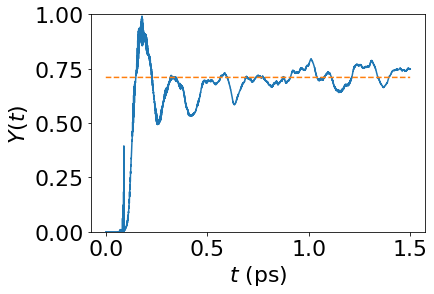

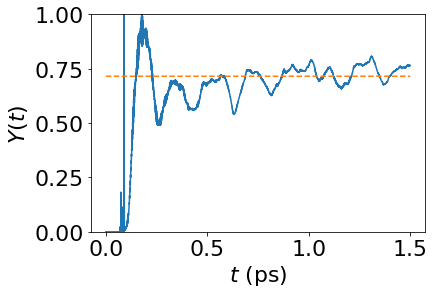

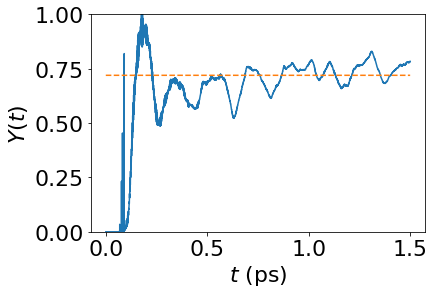

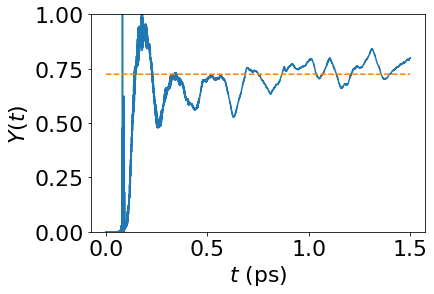

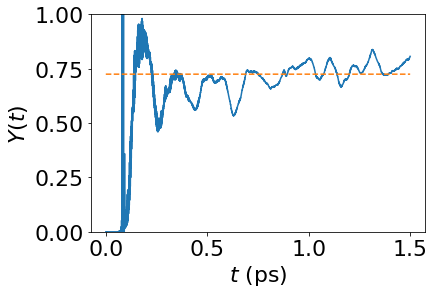

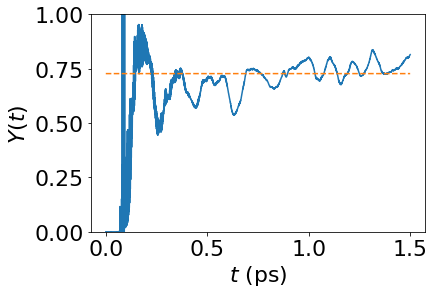

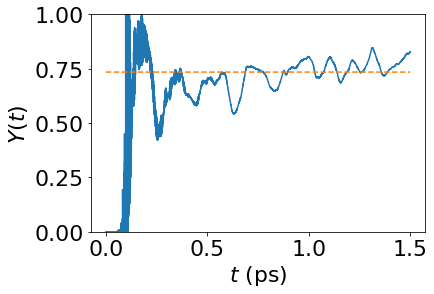

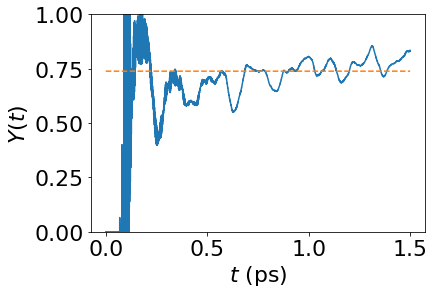

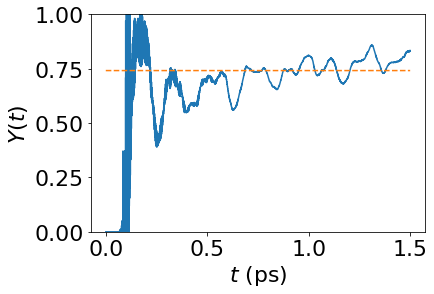

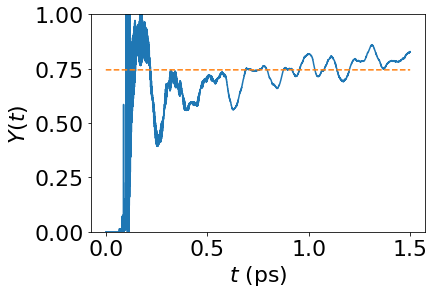

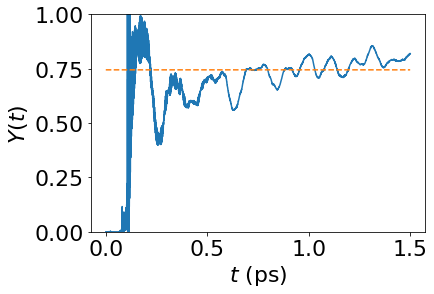

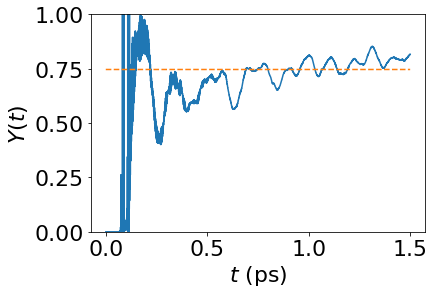

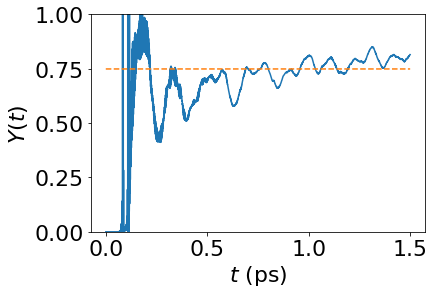

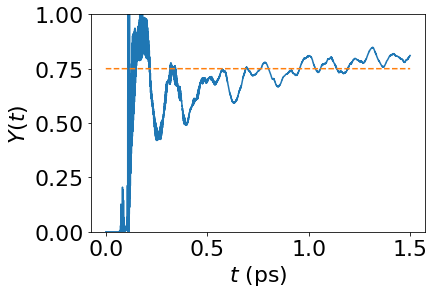

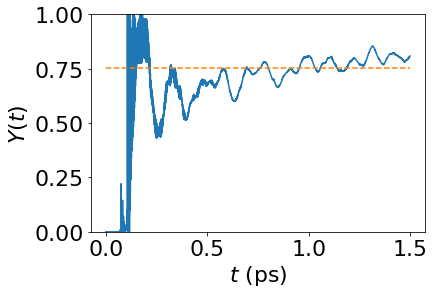

In [122]:
import json
from matplotlib import pyplot as plt
from math import pi


FS_TO_EV = 41.341 / 27.2 
DT = 2 * pi / 2.8 / 30 / FS_TO_EV 


    
for i, t_yield in enumerate(t_yields):
    t = np.array(range(len(t_yield))) * DT / 1000
    plt.plot(t, t_yield)
    plt.plot(t, [yields[i]]*len(t), '--')
    plt.xlabel('$t$ (ps)')
    plt.ylabel('$Y(t)$')
    plt.ylim([0, 1])
    
    if i == 0:
        plt.savefig('yield_epoch_1.eps')
    elif i == len(t_yields) - 1:
        plt.savefig('yield_epoch_{}.eps'.format(i + 1))
    plt.show()

Electric field in the frequency domain:

In [123]:
import sys
sys.path.append("..")
from isom.train_isom import TMAX, FS_TO_EV


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


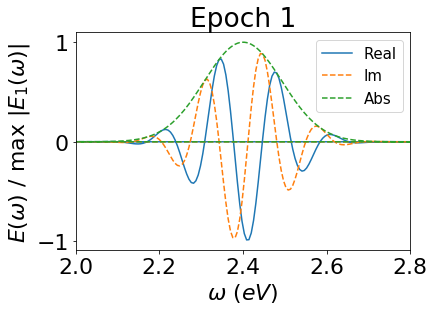

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


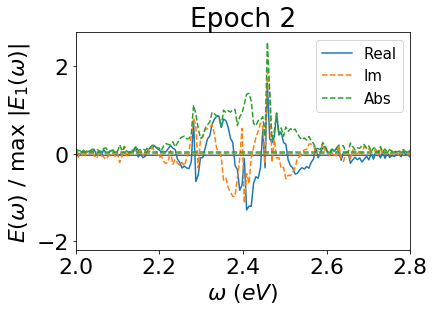

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


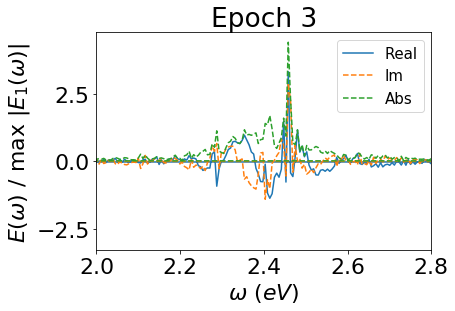

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


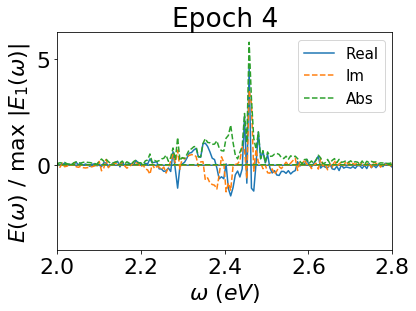

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


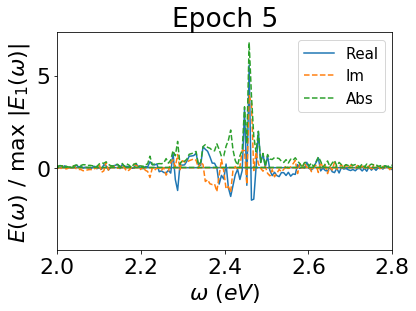

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


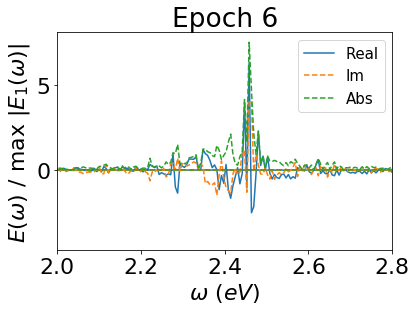

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


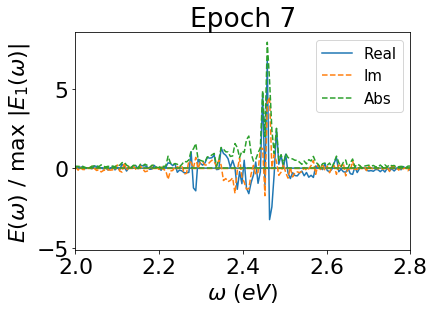

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


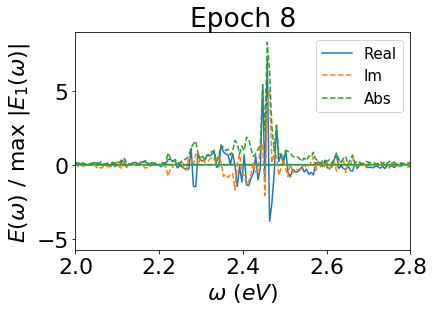

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


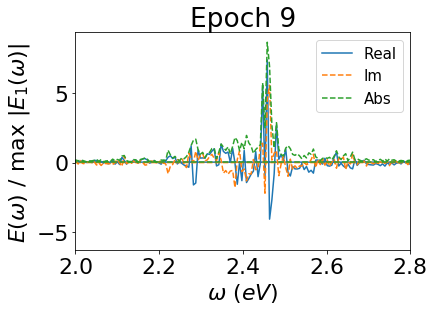

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


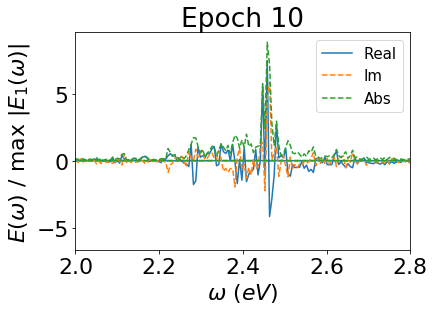

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


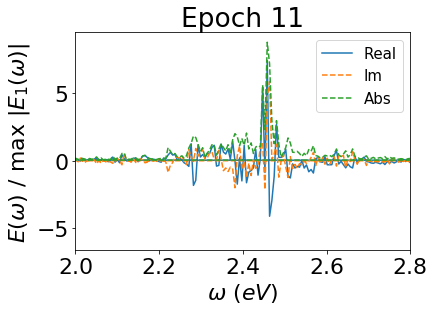

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


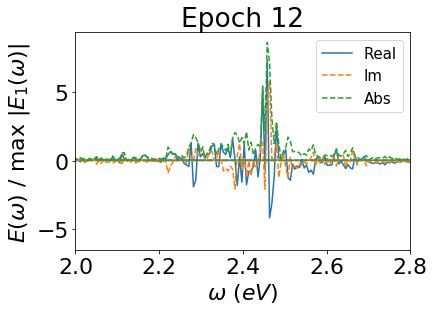

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


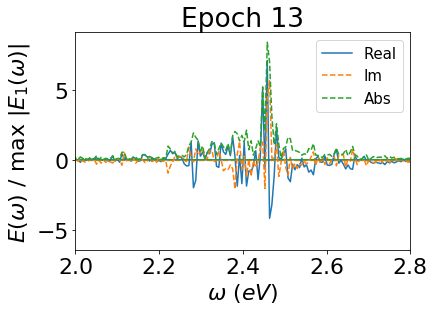

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


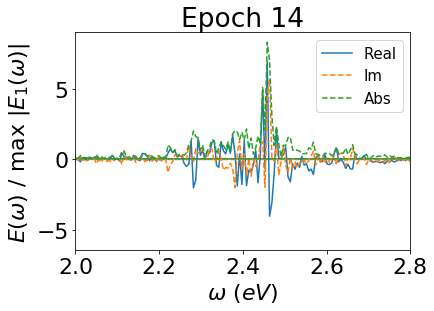

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


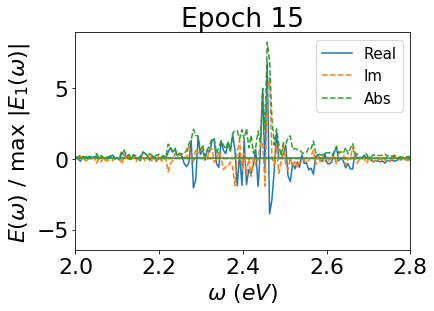

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


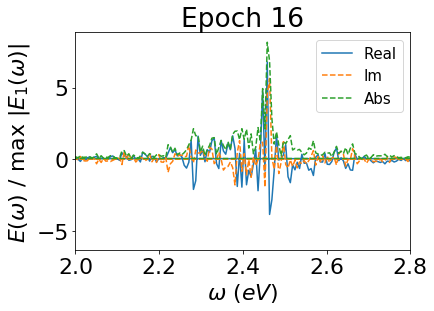

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


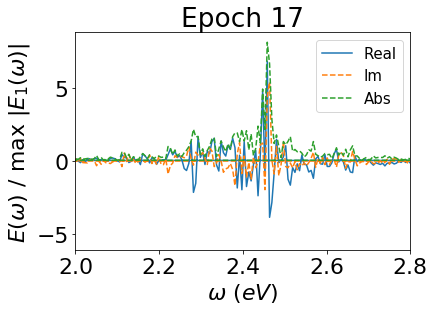

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


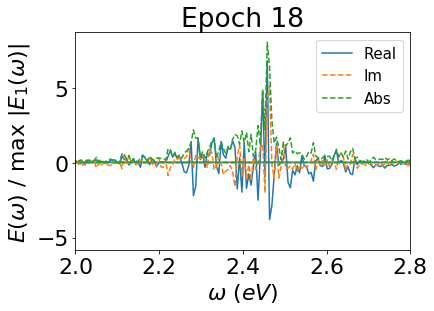

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


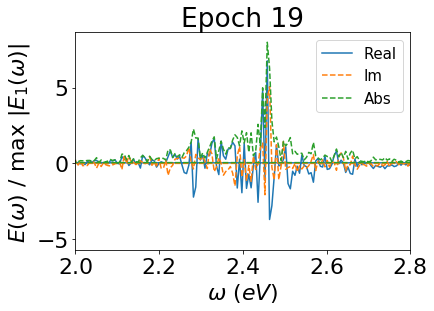

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


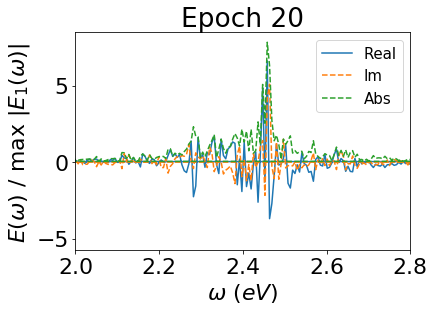

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


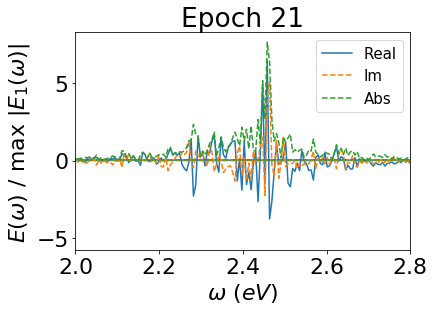

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


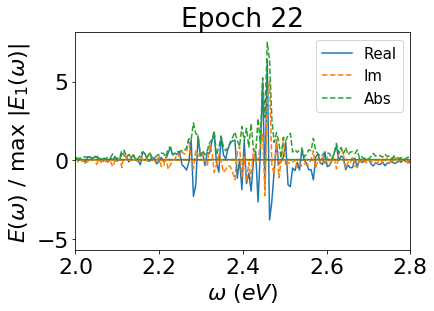

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


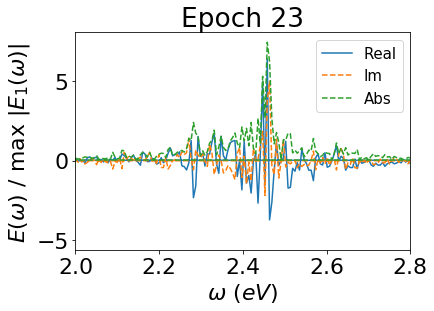

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


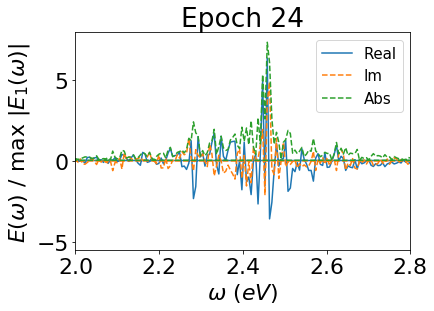

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


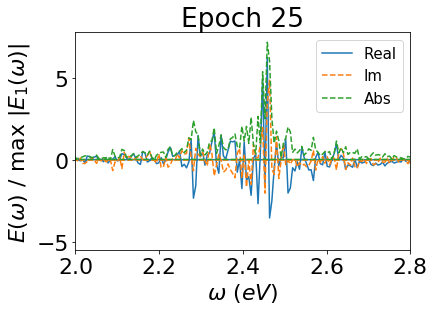

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


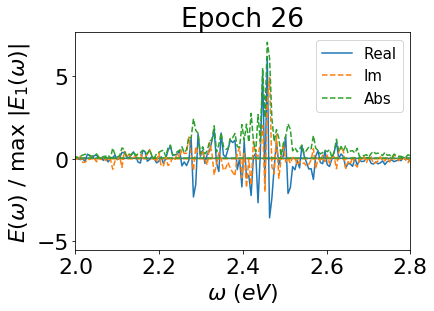

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


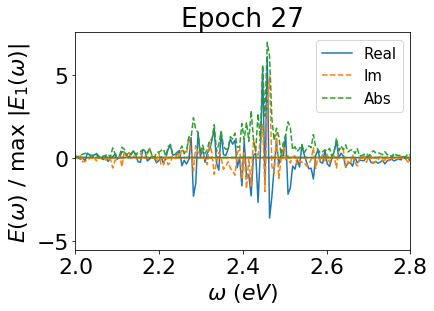

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


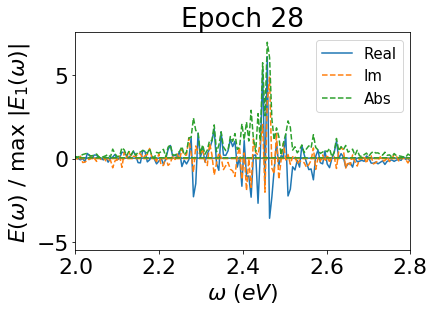

In [124]:
import math


for i in range(len(fields)):
    
    
    t = np.array(fields[i])[:, 0]
    elec_dt =  TMAX / 2 / len(t)

    ft = np.fft.fft(np.array(fields[i])[:, 1]) 
    freq = np.fft.fftfreq(t.shape[-1], elec_dt) * 2 * math.pi
    
    if i == 0:
        mx = np.max(abs(ft))

    plt.plot(freq, np.real(ft) / mx )
    plt.plot(freq, np.imag(ft) / mx, '--')
    plt.plot(freq, np.abs(ft) / mx, '--')


    plt.xlim([2, 2.8])
    plt.xlabel(r'$\omega \ (eV)$')
    plt.ylabel(r'$E(\omega) \ / \ \mathrm{max} \ \vert E_{1}(\omega) \vert$ ')
    plt.title('Epoch {}'.format(i+1))
    plt.legend(['Real', 'Im', 'Abs'], prop={'size': 15})

    plt.savefig('field_epoch_{}.eps'.format(i+1))


    plt.show()